In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\Upwork_data_Agency.xlsx')

In [3]:
df.head()

,Title,Avatar,Name,dinlineblock,Price,mb5,upjobsuccesstext,Keywords,View,upskillbadge,...,upskillbadge5,upskillbadge6,upskillbadge7,upskillbadge8,upskillbadge9,Avatar10,Name11,Name12,mb0,mb013
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agencies,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Expert in editorial and advertising design,https://www.upwork.com/profile-portraits/c1VdX...,Gustavo G.,Spain,$35.00,/hr,100% Job Success,Top Rated,“Gustavo and his team are excellent to work wi...,Adobe InDesign,...,Adobe Acrobat,Editorial Design,Presentation Design,Social Media Design,NaN,https://odesk-prod-portraits.s3.amazonaws.com/...,Associated with,11th Floor Studio,$80k+,earned
2,Digital Marketing Consultant,https://www.upwork.com/profile-portraits/c11H9...,Haris A.,Greece,$240.00,/hr,98% Job Success,Top Rated,"Hello, my name is Haris Aslanidis, and I am th...",Social Media Marketing,...,Business Consulting,Digital Marketing,eCommerce,Event Marketing,B2B Marketing,https://odesk-prod-portraits.s3.amazonaws.com/...,Associated with,Apeiron Digital Universe (former Greek Geeks),$700k+,earned
3,"Ex-Apple Engineer, Expert Mobile Application D...",https://www.upwork.com/profile-portraits/c14dR...,Sagar M.,United States,$45.00,/hr,100% Job Success,Top Rated,I'm an experienced mobile application develope...,iOS Development,...,Java,iPhone App Development,iPhone UI Design,iOS SDK,Backend Rest API,https://odesk-prod-portraits.s3.amazonaws.com/...,Associated with,BrewApps LLC,$20k+,earned
4,PowerPoint Presentation Specialist | Graphic D...,https://www.upwork.com/profile-portraits/c1pCB...,Sampath Kumar S.,India,$25.00,/hr,97% Job Success,Top Rated,McKinsey type of corporate PowerPoint presenta...,Presentation,...,Data Visualization,Pitch Deck,Custom Template Design,Business,Training,https://odesk-prod-portraits.s3.amazonaws.com/...,Associated with,Visual Sculptors,$100k+,earned


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             1089 non-null   object
 1   Avatar            1089 non-null   object
 2   Name              1090 non-null   object
 3   dinlineblock      1090 non-null   object
 4   Price             1090 non-null   object
 5   mb5               1090 non-null   object
 6   upjobsuccesstext  913 non-null    object
 7   Keywords          746 non-null    object
 8   View              1089 non-null   object
 9   upskillbadge      1090 non-null   object
 10  upskillbadge1     1086 non-null   object
 11  upskillbadge2     1081 non-null   object
 12  upskillbadge3     1069 non-null   object
 13  upskillbadge4     1048 non-null   object
 14  upskillbadge5     1018 non-null   object
 15  upskillbadge6     974 non-null    object
 16  upskillbadge7     934 non-null    object
 17  upskillbadge8 

In [5]:
df.columns

Index(['Title', 'Avatar', 'Name', 'dinlineblock', 'Price', 'mb5',
       'upjobsuccesstext', 'Keywords', 'View', 'upskillbadge', 'upskillbadge1',
       'upskillbadge2', 'upskillbadge3', 'upskillbadge4', 'upskillbadge5',
       'upskillbadge6', 'upskillbadge7', 'upskillbadge8', 'upskillbadge9',
       'Avatar10', 'Name11', 'Name12', 'mb0', 'mb013'],
      dtype='object')

In [6]:
df.drop(df.columns[[1, 2, 5, 7, 8, 19, 20, 21]], axis=1, inplace=True)

In [7]:
df.head(5)

,Title,dinlineblock,Price,upjobsuccesstext,upskillbadge,upskillbadge1,upskillbadge2,upskillbadge3,upskillbadge4,upskillbadge5,upskillbadge6,upskillbadge7,upskillbadge8,upskillbadge9,mb0,mb013
0,NaN,NaN,NaN,NaN,Agencies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Expert in editorial and advertising design,Spain,$35.00,100% Job Success,Adobe InDesign,Adobe Photoshop,Presentation Design,Adobe Illustrator,Adobe Creative Cloud,Adobe Acrobat,Editorial Design,Presentation Design,Social Media Design,NaN,$80k+,earned
2,Digital Marketing Consultant,Greece,$240.00,98% Job Success,Social Media Marketing,Marketing Strategy,Digital Strategy,Corporate Strategy,Advertising,Business Consulting,Digital Marketing,eCommerce,Event Marketing,B2B Marketing,$700k+,earned
3,"Ex-Apple Engineer, Expert Mobile Application D...",United States,$45.00,100% Job Success,iOS Development,Android App Development,Mobile Apps,Swift,Kotlin,Java,iPhone App Development,iPhone UI Design,iOS SDK,Backend Rest API,$20k+,earned
4,PowerPoint Presentation Specialist | Graphic D...,India,$25.00,97% Job Success,Presentation,Microsoft PowerPoint,Presentation Design,Microsoft Word,Graphic Design,Data Visualization,Pitch Deck,Custom Template Design,Business,Training,$100k+,earned


In [8]:
df.drop(index=0, inplace=True)

In [9]:
df.head()

,Title,dinlineblock,Price,upjobsuccesstext,upskillbadge,upskillbadge1,upskillbadge2,upskillbadge3,upskillbadge4,upskillbadge5,upskillbadge6,upskillbadge7,upskillbadge8,upskillbadge9,mb0,mb013
1,Expert in editorial and advertising design,Spain,$35.00,100% Job Success,Adobe InDesign,Adobe Photoshop,Presentation Design,Adobe Illustrator,Adobe Creative Cloud,Adobe Acrobat,Editorial Design,Presentation Design,Social Media Design,NaN,$80k+,earned
2,Digital Marketing Consultant,Greece,$240.00,98% Job Success,Social Media Marketing,Marketing Strategy,Digital Strategy,Corporate Strategy,Advertising,Business Consulting,Digital Marketing,eCommerce,Event Marketing,B2B Marketing,$700k+,earned
3,"Ex-Apple Engineer, Expert Mobile Application D...",United States,$45.00,100% Job Success,iOS Development,Android App Development,Mobile Apps,Swift,Kotlin,Java,iPhone App Development,iPhone UI Design,iOS SDK,Backend Rest API,$20k+,earned
4,PowerPoint Presentation Specialist | Graphic D...,India,$25.00,97% Job Success,Presentation,Microsoft PowerPoint,Presentation Design,Microsoft Word,Graphic Design,Data Visualization,Pitch Deck,Custom Template Design,Business,Training,$100k+,earned
5,Expert 3D Artist | Creative Director,Costa Rica,$30.00,96% Job Success,Product Rendering,Jewelry Rendering,Photorealistic Rendering,3D Modeling,Photo Editing,3D Rendering,3DStudio Max,3D Visualization,3D Max,Architectural Rendering,NaN,NaN


In [10]:
df.isnull().sum()

Title                 1
dinlineblock          0
Price                 0
upjobsuccesstext    177
upskillbadge          1
upskillbadge1         4
upskillbadge2         9
upskillbadge3        21
upskillbadge4        42
upskillbadge5        72
upskillbadge6       116
upskillbadge7       156
upskillbadge8       211
upskillbadge9       321
mb0                 100
mb013               100
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 1 to 1090
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             1089 non-null   object
 1   dinlineblock      1090 non-null   object
 2   Price             1090 non-null   object
 3   upjobsuccesstext  913 non-null    object
 4   upskillbadge      1089 non-null   object
 5   upskillbadge1     1086 non-null   object
 6   upskillbadge2     1081 non-null   object
 7   upskillbadge3     1069 non-null   object
 8   upskillbadge4     1048 non-null   object
 9   upskillbadge5     1018 non-null   object
 10  upskillbadge6     974 non-null    object
 11  upskillbadge7     934 non-null    object
 12  upskillbadge8     879 non-null    object
 13  upskillbadge9     769 non-null    object
 14  mb0               990 non-null    object
 15  mb013             990 non-null    object
dtypes: object(16)
memory usage: 136.4+ KB


In [12]:
df = df.rename(columns={"dinlineblock" : "country",
                        "upjobsuccesstext" : "SuccessRate",
                        "upskillbadge" : "skill_1",
                        "upskillbadge1" : "skill_2",
                        "upskillbadge2" : "skill_3",
                        "upskillbadge3" : "skill_4",
                        "upskillbadge4" : "skill_5",
                        "upskillbadge5" : "skill_6",
                        "upskillbadge6" : "skill_7",
                        "upskillbadge7" : "skill_8",
                        "upskillbadge8" : "skill_9",
                        "upskillbadge9" : "skill_10",
                        "mb0" : "rate",
                        "mb013" : "earned"
                        })

In [13]:
df.drop(columns=['skill_7', 'skill_8', 'skill_9', 'skill_10'], inplace=True)

In [14]:
df.isnull().sum()

Title            1
country          0
Price            0
SuccessRate    177
skill_1          1
skill_2          4
skill_3          9
skill_4         21
skill_5         42
skill_6         72
rate           100
earned         100
dtype: int64

In [15]:
df.head(2)

,Title,country,Price,SuccessRate,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,rate,earned
1,Expert in editorial and advertising design,Spain,$35.00,100% Job Success,Adobe InDesign,Adobe Photoshop,Presentation Design,Adobe Illustrator,Adobe Creative Cloud,Adobe Acrobat,$80k+,earned
2,Digital Marketing Consultant,Greece,$240.00,98% Job Success,Social Media Marketing,Marketing Strategy,Digital Strategy,Corporate Strategy,Advertising,Business Consulting,$700k+,earned


In [16]:
df['Title'].fillna('N/A', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32720\3659827490.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'].fillna('N/A', inplace=True)


In [17]:
df.isnull().sum()

Title            0
country          0
Price            0
SuccessRate    177
skill_1          1
skill_2          4
skill_3          9
skill_4         21
skill_5         42
skill_6         72
rate           100
earned         100
dtype: int64

In [18]:
df['skill_1'].fillna('N/A', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32720\531995749.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['skill_1'].fillna('N/A', inplace=True)


In [19]:
df['skill_2'].fillna('N/A', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32720\271435906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['skill_2'].fillna('N/A', inplace=True)


In [20]:
df['skill_3'].fillna('N/A', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32720\3850643469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['skill_3'].fillna('N/A', inplace=True)


In [21]:
df['skill_4'].fillna('N/A', inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32720\1936111746.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['skill_4'].fillna('N/A', inplace=True)


In [22]:
df['skill_5'].fillna(df['skill_5'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32720\1259515552.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['skill_5'].fillna(df['skill_5'].mode()[0], inplace=True)


In [23]:
df['skill_6'].fillna(df['skill_6'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32720\1369194703.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['skill_6'].fillna(df['skill_6'].mode()[0], inplace=True)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 1 to 1090
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1090 non-null   object
 1   country      1090 non-null   object
 2   Price        1090 non-null   object
 3   SuccessRate  913 non-null    object
 4   skill_1      1090 non-null   object
 5   skill_2      1090 non-null   object
 6   skill_3      1090 non-null   object
 7   skill_4      1090 non-null   object
 8   skill_5      1090 non-null   object
 9   skill_6      1090 non-null   object
 10  rate         990 non-null    object
 11  earned       990 non-null    object
dtypes: object(12)
memory usage: 102.3+ KB


In [25]:
df['SuccessRate'].fillna(df['SuccessRate'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32720\3994989656.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SuccessRate'].fillna(df['SuccessRate'].mode()[0], inplace=True)


In [26]:
df['rate'].fillna(df['rate'].mode()[0], inplace=True)
df['earned'].fillna(df['earned'].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_32720\3628226407.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].fillna(df['rate'].mode()[0], inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_32720\3628226407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 1 to 1090
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1090 non-null   object
 1   country      1090 non-null   object
 2   Price        1090 non-null   object
 3   SuccessRate  1090 non-null   object
 4   skill_1      1090 non-null   object
 5   skill_2      1090 non-null   object
 6   skill_3      1090 non-null   object
 7   skill_4      1090 non-null   object
 8   skill_5      1090 non-null   object
 9   skill_6      1090 non-null   object
 10  rate         1090 non-null   object
 11  earned       1090 non-null   object
dtypes: object(12)
memory usage: 102.3+ KB


In [28]:
df['Price'].unique()

array(['$35.00', '$240.00', '$45.00', '$25.00', '$30.00', '$75.00',
       '$60.00', '$175.00', '$13.00', '$105.00', '$15.00', '$100.00',
       '$10.50', '$120.00', '$50.00', '$20.00', '$40.00', '$150.00',
       '$68.75', '$10.00', '$49.75', '$55.00', '$33.33', '$400.00',
       '$16.00', '$19.99', '$90.00', '$22.00', '$19.35', '$18.00',
       '$65.00', '$4.00', '$5.00', '$37.50', '$95.00', '$160.00',
       '$17.00', '$29.00', '$149.97', '$33.00', '$11.11', '$27.78',
       '$55.56', '$125.00', '$13.75', '$52.00', '$35.48', '$59.00',
       '$27.00', '$38.00', '$39.90', '$49.95', '$44.00', '$9.00',
       '$300.00', '$70.00', '$31.00', '$57.00', '$8.00', '$31.25',
       '$59.99', '$36.00', '$23.00', '$8.50', '$115.00', '$11.00',
       '$18.75', '$28.00', '$165.00', '$12.00', '$80.00', '$19.00',
       '$6.00', '$32.00', '$38.75', '$16.67', '$14.00', '$22.50',
       '$250.00', '$8.75', '$7.78', '$47.00', '$85.00', '$99.00',
       '$53.00', '$6.25', '$9.89', '$15.50', '$39.99', '

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [30]:
class DollarToCentsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y =None):
        return self

    def transform(self, X):
        return (X.str.replace('$', '', regex=False)  
                .str.strip()                       
                .astype(float)                   
                .mul(100)                          
                .astype(int)                      
                )
        
pipeline = Pipeline(steps=[
    ('clean_data', DollarToCentsTransformer())
])

df['Price'] = pipeline.fit_transform(df['Price'])

In [31]:
df['Price'].unique()

array([ 3500, 24000,  4500,  2500,  3000,  7500,  6000, 17500,  1300,
       10500,  1500, 10000,  1050, 12000,  5000,  2000,  4000, 15000,
        6875,  1000,  4975,  5500,  3333, 40000,  1600,  1998,  9000,
        2200,  1935,  1800,  6500,   400,   500,  3750,  9500, 16000,
        1700,  2900, 14997,  3300,  1111,  2778,  5556, 12500,  1375,
        5200,  3547,  5900,  2700,  3800,  3990,  4995,  4400,   900,
       30000,  7000,  3100,  5700,   800,  3125,  5999,  3600,  2300,
         850, 11500,  1100,  1875,  2800, 16500,  1200,  8000,  1900,
         600,  3200,  3875,  1667,  1400,  2250, 25000,   875,   778,
        4700,  8500,  9900,  5300,   625,   989,  1550,  3999,   750,
        3400,  2840,  6200,  5250,  3375,  5400,   700,  2400,  5626,
         300,  2350,  4200,   550,  1250,  1321,  4600,  2222,  3700,
       13000,  6600, 19700,  6998, 13500,  6900,   556,   688,  1125,
        3497,  1944,  8800,   799,  2007,   450,  6550,  4900,  2480,
        3550, 11000,

In [32]:
df['rate'].unique()

array(['$80k+', '$700k+', '$20k+', '$100k+', '$400k+', '$1M+', '$10k+',
       '$1k+', '$500k+', '$100+', '$8k+', '$5M+', '$60k+', '$9k+',
       '$200k+', '$7k+', '$4k+', '$50k+', '$2k+', '$300k+', '$30k+',
       '$90k+', '$600k+', '$6M+', '$600', '$4M+', '$40k+', '$900k+',
       '$2M+', '$10M+', '$5k+', '$800k+', '$3M+', '$8M+', '$6k+', '$900+',
       '$3k+', '$70k+', '$9M+', '$400+', '$20+', '$50+', '$80+', '$60+',
       '$100', '$10', '$20M+', '$40', '$300+', '$7M+', '$90+', '$700',
       '$800', '$200+', '$30', '$800+', '$50M+', '$10+', '$200', '$2k',
       '$40M+', '$600+'], dtype=object)

In [33]:
class SalaryToDollarsTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def convert_salary(salary):
            salary = salary.replace('$', '').strip()
            if 'M' in salary:
                return int(float(salary.replace('M', '').replace('+', '').strip()) * 1_000_000)
            elif 'k' in salary:
                return int(float(salary.replace('k', '').replace('+', '').strip()) * 1_000)
            else:
                return int(salary.replace('+', '').strip())
        
        return X.apply(convert_salary)
    
pipeline = Pipeline(steps=[
    ('rate_conversion', SalaryToDollarsTransformer())
])

df['rate'] = pipeline.fit_transform(df['rate'])

In [34]:
df['rate'].unique()

array([   80000,   700000,    20000,   100000,   400000,  1000000,
          10000,     1000,   500000,      100,     8000,  5000000,
          60000,     9000,   200000,     7000,     4000,    50000,
           2000,   300000,    30000,    90000,   600000,  6000000,
            600,  4000000,    40000,   900000,  2000000, 10000000,
           5000,   800000,  3000000,  8000000,     6000,      900,
           3000,    70000,  9000000,      400,       20,       50,
             80,       60,       10, 20000000,       40,      300,
        7000000,       90,      700,      800,      200,       30,
       50000000, 40000000])

In [35]:
df.head()

,Title,country,Price,SuccessRate,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,rate,earned
1,Expert in editorial and advertising design,Spain,3500,100% Job Success,Adobe InDesign,Adobe Photoshop,Presentation Design,Adobe Illustrator,Adobe Creative Cloud,Adobe Acrobat,80000,earned
2,Digital Marketing Consultant,Greece,24000,98% Job Success,Social Media Marketing,Marketing Strategy,Digital Strategy,Corporate Strategy,Advertising,Business Consulting,700000,earned
3,"Ex-Apple Engineer, Expert Mobile Application D...",United States,4500,100% Job Success,iOS Development,Android App Development,Mobile Apps,Swift,Kotlin,Java,20000,earned
4,PowerPoint Presentation Specialist | Graphic D...,India,2500,97% Job Success,Presentation,Microsoft PowerPoint,Presentation Design,Microsoft Word,Graphic Design,Data Visualization,100000,earned
5,Expert 3D Artist | Creative Director,Costa Rica,3000,96% Job Success,Product Rendering,Jewelry Rendering,Photorealistic Rendering,3D Modeling,Photo Editing,3D Rendering,100000,earned


In [38]:
df.drop(columns='earned', inplace=True)

In [39]:
df

,Title,country,Price,SuccessRate,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,rate
1,Expert in editorial and advertising design,Spain,3500,100% Job Success,Adobe InDesign,Adobe Photoshop,Presentation Design,Adobe Illustrator,Adobe Creative Cloud,Adobe Acrobat,80000
2,Digital Marketing Consultant,Greece,24000,98% Job Success,Social Media Marketing,Marketing Strategy,Digital Strategy,Corporate Strategy,Advertising,Business Consulting,700000
3,"Ex-Apple Engineer, Expert Mobile Application D...",United States,4500,100% Job Success,iOS Development,Android App Development,Mobile Apps,Swift,Kotlin,Java,20000
4,PowerPoint Presentation Specialist | Graphic D...,India,2500,97% Job Success,Presentation,Microsoft PowerPoint,Presentation Design,Microsoft Word,Graphic Design,Data Visualization,100000
5,Expert 3D Artist | Creative Director,Costa Rica,3000,96% Job Success,Product Rendering,Jewelry Rendering,Photorealistic Rendering,3D Modeling,Photo Editing,3D Rendering,100000
...,...,...,...,...,...,...,...,...,...,...,...
1086,"Partner, Experience Design",United States,25000,100% Job Success,Design Research,Prototyping,User Experience Design,Service Design,Experience Design,Healthcare & Medical,300000
1087,Senior UI/UX designer,Russia,3000,100% Job Success,Web Design,Graphic Design,Responsive Web Design,Landing Page,Mobile UI Design,Mobile App Design,9000000
1088,"Backend Web Developer (Python, Django)",Poland,6000,100% Job Success,Django,Python,MongoDB,MySQL,HTML5,CSS3,2000000
1089,iPhone App | Website | AR | VR | Unity | Roblo...,United States,10000,96% Job Success,Unity,Swift,Augmented Reality,Game Development,Mobile App Development,Virtual Reality,10000


In [40]:
df['Price'] = df['Price'].astype(int)
df['rate'] = df['rate'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 1 to 1090
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1090 non-null   object
 1   country      1090 non-null   object
 2   Price        1090 non-null   int64 
 3   SuccessRate  1090 non-null   object
 4   skill_1      1090 non-null   object
 5   skill_2      1090 non-null   object
 6   skill_3      1090 non-null   object
 7   skill_4      1090 non-null   object
 8   skill_5      1090 non-null   object
 9   skill_6      1090 non-null   object
 10  rate         1090 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 93.8+ KB


In [52]:
df['SuccessRate'].unique()

array(['100% Job Success', '98% Job Success', '97% Job Success',
       '96% Job Success', '95% Job Success', '94% Job Success',
       '86% Job Success', '72% Job Success', '82% Job Success',
       '90% Job Success', '92% Job Success', '93% Job Success',
       '99% Job Success', '89% Job Success', '83% Job Success',
       '79% Job Success', '73% Job Success', '84% Job Success',
       '88% Job Success', '91% Job Success', '87% Job Success',
       '77% Job Success', '85% Job Success', '68% Job Success',
       '81% Job Success', '78% Job Success', '63% Job Success',
       '75% Job Success', '80% Job Success', '66% Job Success',
       '74% Job Success', '59% Job Success', '76% Job Success',
       '70% Job Success'], dtype=object)

In [53]:
import re

In [54]:
df['SuccessRate'] = [int(re.sub(r'[^\d]+', '', x)) for x in df['SuccessRate']]

In [55]:
df['SuccessRate'].unique()

array([100,  98,  97,  96,  95,  94,  86,  72,  82,  90,  92,  93,  99,
        89,  83,  79,  73,  84,  88,  91,  87,  77,  85,  68,  81,  78,
        63,  75,  80,  66,  74,  59,  76,  70])

In [56]:
df['SuccessRate'] = df['SuccessRate'].astype(int)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 1 to 1090
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        1090 non-null   object
 1   country      1090 non-null   object
 2   Price        1090 non-null   int64 
 3   SuccessRate  1090 non-null   int64 
 4   skill_1      1090 non-null   object
 5   skill_2      1090 non-null   object
 6   skill_3      1090 non-null   object
 7   skill_4      1090 non-null   object
 8   skill_5      1090 non-null   object
 9   skill_6      1090 non-null   object
 10  rate         1090 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 93.8+ KB


In [42]:
df['Title'].unique()

array(['Expert in editorial and advertising design',
       'Digital Marketing Consultant',
       'Ex-Apple Engineer, Expert Mobile Application Developer, iOS, Android',
       ..., 'Backend Web Developer (Python, Django)',
       'iPhone App | Website | AR | VR | Unity | Roblox Game',
       'Logos, Brochures, Identity packages, Web design'], dtype=object)

In [51]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
import nltk
print(nltk.data.path)


['C:\\Users\\Admin/nltk_data', 'c:\\Users\\Admin\\Desktop\\FreelancingRecommendtaionSystem\\Reommendenv\\nltk_data', 'c:\\Users\\Admin\\Desktop\\FreelancingRecommendtaionSystem\\Reommendenv\\share\\nltk_data', 'c:\\Users\\Admin\\Desktop\\FreelancingRecommendtaionSystem\\Reommendenv\\lib\\nltk_data', 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [59]:
import nltk
nltk.download('punkt', download_dir='C:\\Users\\Admin\\nltk_data')
nltk.download('stopwords', download_dir='C:\\Users\\Admin\\nltk_data')


[nltk_data] Downloading package punkt to C:\Users\Admin\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [60]:
nltk.data.path.append('C:\\Users\\Admin\\nltk_data')


In [61]:
from nltk.corpus import stopwords
print(stopwords.words('english'))  # This should print a list of stopwords


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [62]:
import string
import nltk # Import the string module
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

df['Title'] = df['Title'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'c:\\Users\\Admin\\Desktop\\FreelancingRecommendtaionSystem\\Reommendenv\\nltk_data'
    - 'c:\\Users\\Admin\\Desktop\\FreelancingRecommendtaionSystem\\Reommendenv\\share\\nltk_data'
    - 'c:\\Users\\Admin\\Desktop\\FreelancingRecommendtaionSystem\\Reommendenv\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'C:\\Users\\Admin\\nltk_data'
**********************************************************************


In [63]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess_text_spacy(text):
    doc = nlp(text.lower())  # Tokenize and lowercase
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)

df['Title'] = df['Title'].apply(preprocess_text_spacy)


In [64]:
df['Title'].unique()

array(['expert editorial advertising design',
       'digital marketing consultant',
       'ex apple engineer expert mobile application developer io android',
       ..., 'backend web developer python django',
       'iphone app | website | ar | vr | unity | roblox game',
       'logo brochure identity package web design'], dtype=object)

In [67]:
import re
from transformers import AutoTokenizer

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def preprocess_text_transformers(text):
    # Remove special characters and symbols using regex
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text.lower())  # Keep only alphanumeric and spaces
    # Tokenize the cleaned text
    tokens = tokenizer.tokenize(text)
    return ' '.join(tokens)

# Apply the preprocessing function to the DataFrame
df['Title'] = df['Title'].apply(preprocess_text_transformers)


In [68]:
df['Title'].unique()

array(['expert editorial advertising design',
       'digital marketing consultant',
       'ex apple engineer expert mobile application developer io android',
       ..., 'back end web developer python dj ang ##o',
       'iphone app website ar vr unity rob lo x game',
       'logo bro chu re identity package web design'], dtype=object)

In [69]:
df.head(10)

,Title,country,Price,SuccessRate,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,rate
1,expert editorial advertising design,Spain,3500,100,Adobe InDesign,Adobe Photoshop,Presentation Design,Adobe Illustrator,Adobe Creative Cloud,Adobe Acrobat,80000
2,digital marketing consultant,Greece,24000,98,Social Media Marketing,Marketing Strategy,Digital Strategy,Corporate Strategy,Advertising,Business Consulting,700000
3,ex apple engineer expert mobile application de...,United States,4500,100,iOS Development,Android App Development,Mobile Apps,Swift,Kotlin,Java,20000
4,power point presentation specialist graphic de...,India,2500,97,Presentation,Microsoft PowerPoint,Presentation Design,Microsoft Word,Graphic Design,Data Visualization,100000
5,expert 3d artist creative director,Costa Rica,3000,96,Product Rendering,Jewelry Rendering,Photorealistic Rendering,3D Modeling,Photo Editing,3D Rendering,100000
6,expert medical writer supplement formula tor,United States,7500,95,Medical,Copywriting,Technical Writing,Sales Writing,Scientific Writing,Editing,400000
7,u x ui design director app design web design s...,Ukraine,6000,94,Web Design,Mobile UI Design,User Experience Design,UX Design,SaaS,Branding,1000000
8,fraction al chief marketing officer startup tr...,United States,17500,86,Entrepreneurship,Business Plan,Customer Experience,Management Consulting,Business Coaching,Marketing,10000
9,cs r iii dat um entry spec lean sigma yellow b...,Philippines,1300,100,Excel VBA,IBM Rational Rose,vCita,.NET Remoting,.NET CF,Windows Media Connect,700000
10,ui designer child book illustrator cartoonist ...,Ukraine,2500,72,Logo Design,Adobe Photoshop,Web Design,Adobe Illustrator,Digital Illustration,Cartoon Character,1000


In [72]:
df.columns

Index(['Title', 'country', 'Price', 'SuccessRate', 'skill_1', 'skill_2',
       'skill_3', 'skill_4', 'skill_5', 'skill_6', 'rate'],
      dtype='object')

In [71]:
df.to_csv('cleaned_data.csv', index=False)

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['rate'] = scaler.fit_transform(df[['rate']])

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

# Load your dataset
df = pd.read_csv(r'C:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\cleaned_data.csv')

# Encode categorical features
label_encoders = {}
for column in ['country', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Prepare input features and target variable
X = df[['country', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']]
y = df['rate']  # Assuming 'rate' is the target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
# Input for country
country_input = Input(shape=(1,), name='country_input')
country_embedding = Embedding(input_dim=len(df['country'].unique()), output_dim=8)(country_input)
country_vec = Flatten()(country_embedding)

# Input for skills
skills_input = Input(shape=(6,), name='skills_input')  # Change to 6 for the number of skills
skills_vec = Flatten()(skills_input)

# Concatenate user and item vectors
concat = Concatenate()([country_vec, skills_vec])
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1)(dense2)  # For regression

model = Model(inputs=[country_input, skills_input], outputs=output)
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
model.fit([X_train['country'], X_train[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values], y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate([X_test['country'], X_test[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values], y_test)
print(f'Test Loss: {loss}')

# Making predictions
predictions = model.predict([X_test['country'], X_test[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values])
top_n_indices = np.argsort(predictions.flatten())[-10:]  # Get top 10 recommendations
recommended_freelancers = df.iloc[top_n_indices]

print("Recommended Freelancers:")
print(recommended_freelancers[['Title', 'country', 'Price', 'SuccessRate', 'rate']])

Epoch 1/10


c:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\Reommendenv\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['country_input', 'skills_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6540598706176.0000  
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5605891768320.0000
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9204660174848.0000
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8899265560576.0000
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11215428386816.0000
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13088251183104.0000  
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10641195663360.0000
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9076179206144.0000 
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12562178506752.0000
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4345603817472.0000
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4523262738432.0000  


c:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\Reommendenv\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['country_input', 'skills_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Test Loss: 5814514352128.0
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Recommended Freelancers:
                                                 Title  country  Price  \
55        email deliver ability email marketing expert       24  40000   
185  shop if ##y partner shop if ##y expert profess...       44   3500   
126                                  ceo senior editor       53   2500   
48   quick books expert phone support administrativ...       47   1000   
165  project manager eco mm ##er ce shop if ##y expert       44   2500   
159     expert web developer special i ##ze word press       61   6500   
158                     stack ruby ruby rail developer       59   5500   
60      expert mood le word press mobile app developer       24   2000   
179  google analytics conversion rate optimization ...       51   6500   
76   expert accountant book keeper quick book x er ...       44   2000   

     SuccessRate     rate  
55           100    50000  
185           93   400000  
126        

c:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\Reommendenv\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['country_input', 'skills_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset
df = pd.read_csv(r'C:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\cleaned_data.csv')

# Normalize the target variable
scaler = MinMaxScaler()
df['rate'] = scaler.fit_transform(df[['rate']])

# Encode categorical features
label_encoders = {}
for column in ['country', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Prepare input features and target variable
X = df[['country', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']]
y = df['rate']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
country_input = Input(shape=(1,), name='country_input')
country_embedding = Embedding(input_dim=len(df['country'].unique()), output_dim=8)(country_input)
country_vec = Flatten()(country_embedding)

skills_input = Input(shape=(6,), name='skills_input')
skills_vec = Flatten()(skills_input)

concat = Concatenate()([country_vec, skills_vec])
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1)(dense2)

model = Model(inputs=[country_input, skills_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Debugging input shapes
print("Country input shape:", X_train['country'].values.shape)  # Should be (num_samples,)
print("Skills input shape:", X_train[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values.shape)  # Should be (num_samples, 6)
print("Target shape:", y_train.values.shape)  # Should be (num_samples,)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    [X_train['country'].values, X_train[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values],
    y_train.values,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model
loss = model.evaluate(
    [X_test['country'].values, X_test[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values],
    y_test.values
)
print(f'Test Loss: {loss}')

# Making predictions
predictions = model.predict(
    [X_test['country'].values, X_test[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values]
)
top_n_indices = np.argsort(predictions.flatten())[-10:]  # Get top 10 recommendations
recommended_freelancers = df.iloc[top_n_indices]

print("Recommended Freelancers:")
print(recommended_freelancers[['Title', 'country', 'Price', 'SuccessRate', 'rate']])

Country input shape: (872,)
Skills input shape: (872, 6)
Target shape: (872,)
Epoch 1/10


c:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\Reommendenv\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['country_input', 'skills_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 468.9090 - val_loss: 40.7425
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.9738 - val_loss: 18.2183
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.6212 - val_loss: 14.8059
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3512 - val_loss: 9.4229
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3282 - val_loss: 8.2185
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.8040 - val_loss: 7.0623
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.7052 - val_loss: 6.2101
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2402 - val_loss: 5.8899
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1118 - val_loss: 5.4924
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5313 - val_loss: 5.2347
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8938
Test Loss: 5.474922180175781
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Recommended Freelancers:
                  

c:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\Reommendenv\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['country_input', 'skills_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1263 - val_loss: 4.8388
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9277 - val_loss: 5.1150
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8542 - val_loss: 5.0856
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8631 - val_loss: 4.3769
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8943 - val_loss: 5.1462
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6367 - val_loss: 5.1650
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6907 - val_loss: 4.4100


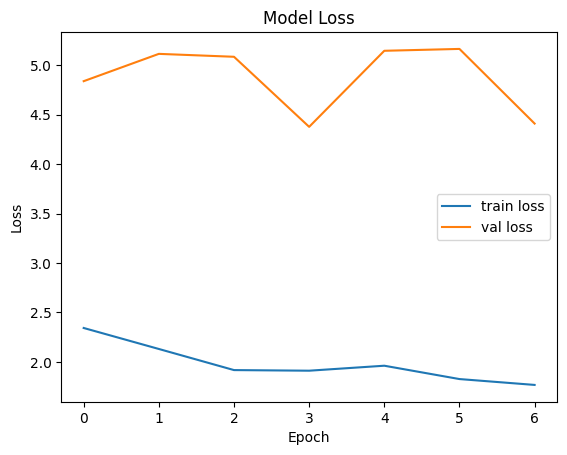

In [84]:
import matplotlib.pyplot as plt

history = model.fit(
    [X_train['country'].values, X_train[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values],
    y_train.values,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [85]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Load your dataset
df = pd.read_csv(r'C:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\cleaned_data.csv')

# Normalize the target variable
scaler = MinMaxScaler()
df['rate'] = scaler.fit_transform(df[['rate']])

# Encode categorical features
label_encoders = {}
for column in ['country', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Prepare input features and target variable
X = df[['country', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']]
y = df['rate']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
country_input = Input(shape=(1,), name='country_input')
country_embedding = Embedding(input_dim=len(df['country'].unique()), output_dim=8)(country_input)
country_vec = Flatten()(country_embedding)

skills_input = Input(shape=(6,), name='skills_input')
skills_vec = Flatten()(skills_input)

concat = Concatenate()([country_vec, skills_vec])
dense1 = Dense(128, activation='relu')(concat)
dense2 = Dense(64, activation='relu')(dense1)
output = Dense(1)(dense2)

model = Model(inputs=[country_input, skills_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Debugging input shapes
print("Country input shape:", X_train['country'].values.shape)  # Should be (num_samples,)
print("Skills input shape:", X_train[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values.shape)  # Should be (num_samples, 6)
print("Target shape:", y_train.values.shape)  # Should be (num_samples,)

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    [X_train['country'].values, X_train[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values],
    y_train.values,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model
loss = model.evaluate(
    [X_test['country'].values, X_test[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values],
    y_test.values
)
print(f'Test Loss: {loss}')

# Making predictions
predictions = model.predict(
    [X_test['country'].values, X_test[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values]
)
top_n_indices = np.argsort(predictions.flatten())[-10:]  # Get top 10 recommendations
recommended_freelancers = df.iloc[top_n_indices]

print("Recommended Freelancers:")
print(recommended_freelancers[['Title', 'country', 'Price', 'SuccessRate', 'rate']])

Country input shape: (872,)
Skills input shape: (872, 6)
Target shape: (872,)
Epoch 1/10


c:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\Reommendenv\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['country_input', 'skills_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 480.6862 - val_loss: 68.7309
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 42.1152 - val_loss: 19.0984
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.3302 - val_loss: 10.2143
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4124 - val_loss: 6.6871
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4380 - val_loss: 5.6424
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.1954 - val_loss: 7.4738
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.5041 - val_loss: 4.9446
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.8443 - val_loss: 5.8330
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.2680 - val_loss: 3.6596
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6234 - val_loss: 3.2102
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3268
Test Loss: 4.349358558654785
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Recommended Freelancers:
                 

c:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\Reommendenv\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['country_input', 'skills_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


Country input shape: (872,)
Skills input shape: (872, 6)
Target shape: (872,)
Epoch 1/50


c:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\Reommendenv\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['country_input', 'skills_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2764.0967 - val_loss: 110.1111
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 921.2610 - val_loss: 82.3326
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 439.2821 - val_loss: 36.3970
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 209.3768 - val_loss: 23.3619
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131.6585 - val_loss: 15.1385
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 111.3233 - val_loss: 12.5106
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.9693 - val_loss: 9.1216
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.2563 - val_loss: 7.0073
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.0276 - val_loss: 5.5067
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 44.4733 - val_loss: 3.4454
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.5521 - val_loss: 2.6728
Epoch 12/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 

c:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\Reommendenv\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['country_input', 'skills_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


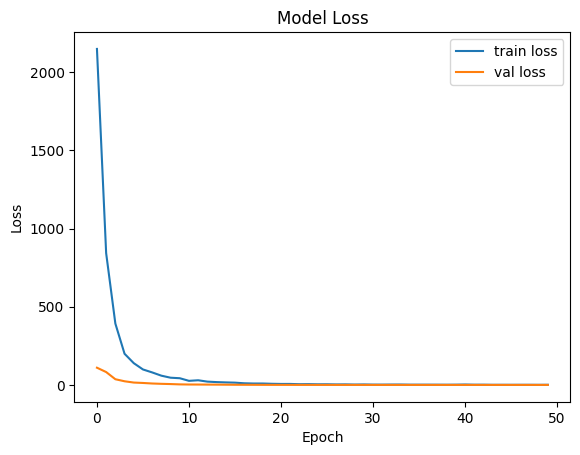

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv(r'C:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\cleaned_data.csv')

# Normalize the target variable
scaler = MinMaxScaler()
df['rate'] = scaler.fit_transform(df[['rate']])

# Encode categorical features
label_encoders = {}
for column in ['country', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Prepare input features and target variable
X = df[['country', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']]
y = df['rate']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
country_input = Input(shape=(1,), name='country_input')
country_embedding = Embedding(input_dim=len(df['country'].unique()), output_dim=8)(country_input)
country_vec = Flatten()(country_embedding)

skills_input = Input(shape=(6,), name='skills_input')
skills_vec = Flatten()(skills_input)

concat = Concatenate()([country_vec, skills_vec])
dense1 = Dense(128, activation='relu')(concat)
dropout1 = Dropout(0.2)(dense1)  # Add dropout for regularization
dense2 = Dense(64, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense2)  # Add dropout for regularization
output = Dense(1)(dropout2)

model = Model(inputs=[country_input, skills_input], outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Debugging input shapes
print("Country input shape:", X_train['country'].values.shape)  # Should be (num_samples,)
print("Skills input shape:", X_train[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values.shape)  # Should be (num_samples, 6)
print("Target shape:", y_train.values.shape)  # Should be (num_samples,)

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    [X_train['country'].values, X_train[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values],
    y_train.values,
    validation_split=0.2,
    epochs=50,  # Increase epochs for better training
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model
loss = model.evaluate(
    [X_test['country'].values, X_test[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values],
    y_test.values
)
print(f'Test Loss: {loss}')

# Making predictions
predictions = model.predict(
    [X_test['country'].values, X_test[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values]
)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)

# Get top N recommendations
top_n_indices = np.argsort(predictions.flatten())[-10:]  # Get top 10 recommendations
recommended_freelancers = df.iloc[top_n_indices]

print("Recommended Freelancers:")
print(recommended_freelancers[['Title', 'country', 'Price', 'SuccessRate', 'rate']])

# Plot training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
loss = model.evaluate(
    [X_test['country'].values, X_test[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values],
    y_test.values
)
print(f'Test Loss (MSE): {loss}')

# Making predictions
predictions = model.predict(
    [X_test['country'].values, X_test[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].values]
)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(predictions)

# Calculate regression metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078
Test Loss (MSE): 0.006930087227374315
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Absolute Error (MAE): 1949706.2289332398
Mean Squared Error (MSE): 11782618518343.117
Root Mean Squared Error (RMSE): 3432581.9026416712
R-squared (R²): -5770913027594970.0


                                               Title        country  Price  \
0                expert editorial advertising design          Spain   3500   
1                       digital marketing consultant         Greece  24000   
2  ex apple engineer expert mobile application de...  United States   4500   
3  power point presentation specialist graphic de...          India   2500   
4                 expert 3d artist creative director     Costa Rica   3000   

   SuccessRate                 skill_1                  skill_2  \
0          100          Adobe InDesign          Adobe Photoshop   
1           98  Social Media Marketing       Marketing Strategy   
2          100         iOS Development  Android App Development   
3           97            Presentation     Microsoft PowerPoint   
4           96       Product Rendering        Jewelry Rendering   

                    skill_3             skill_4               skill_5  \
0       Presentation Design   Adobe Illustrator  Adobe 

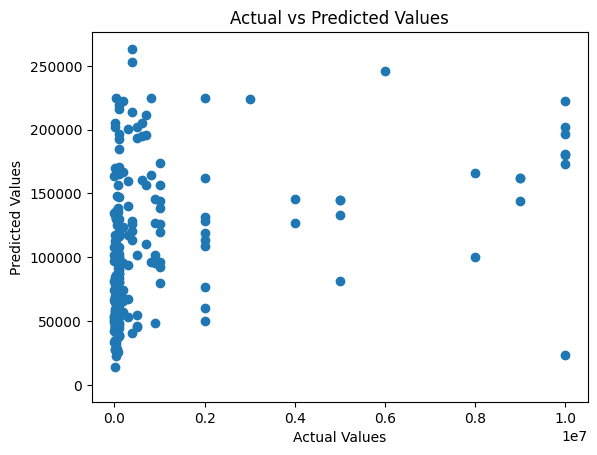

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_csv(r'C:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\cleaned_data.csv')

# Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: drop rows with missing target)
df.dropna(subset=['rate'], inplace=True)

# Encode categorical features
label_encoders = {}
for column in ['country', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Prepare input features and target variable
X = df[['country', 'skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']]
y = df['rate']

# Log transform the target variable to stabilize variance
y = np.log1p(y)  # log1p is used to handle zero values safely

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

# Inverse transform the predictions to original scale
y_pred_original = np.expm1(y_pred)  # Inverse of log1p

# Calculate regression metrics
mae = mean_absolute_error(np.expm1(y_test), y_pred_original)
mse = mean_squared_error(np.expm1(y_test), y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(np.expm1(y_test), y_pred_original)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

# Visualize predictions
plt.scatter(np.expm1(y_test), y_pred_original)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

In [108]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset
df = pd.read_csv(r'C:\Users\Admin\Desktop\FreelancingRecommendtaionSystem\cleaned_data.csv')

# Assuming the dataset has columns: 'Title', 'country', 'Price', 'SuccessRate', 'skills'
# Combine all skills into a single string for each freelancer
df['skills_combined'] = df[['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6']].fillna('').agg(' '.join, axis=1)

# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['skills_combined'])

# Function to recommend freelancers based on project skills
def recommend_freelancers(project_skills, top_n=5):
    # Transform the project skills into the same TF-IDF space
    project_tfidf = tfidf.transform([project_skills])
    
    # Calculate cosine similarity between the project and all freelancers
    cosine_similarities = cosine_similarity(project_tfidf, tfidf_matrix).flatten()
    
    # Get the top N indices of freelancers based on similarity scores
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]
    
    # Return the recommended freelancers
    return df.iloc[top_indices][['Title', 'country', 'Price', 'SuccessRate', 'skills_combined']]

# Example project skills
project_skills = "Python data analysis machine learning"
recommended_freelancers = recommend_freelancers(project_skills)

print("Recommended Freelancers:")
print(recommended_freelancers)

Recommended Freelancers:
                                                 Title        country  Price  \
30   data scientist analytics ml plot l ##y dash py...         Brazil   4975   
917                  data scientist software developer  United States  10000   
689                             machine learn engineer         Poland   9900   
367                 machine learning ai neural network         Russia   5000   
417  computer vision natural language processing ex...         Russia   3400   

     SuccessRate                                    skills_combined  
30           100  Data Analysis Data Mining Data Science Data Vi...  
917          100  Python SciPy TensorFlow Data Extraction Machin...  
689          100  Deep Learning Machine Learning TensorFlow Kera...  
367          100  Machine Learning Artificial Intelligence Deep ...  
417           93  Machine Learning Python Computer Vision Natura...  
